# 전국 신규 민간 아파트 분양 가격 동향

- 2015년 2018년 7월까지
- 주택 분양 보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향

In [1]:
import numpy as np
import pandas as pd
import re

In [26]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/User/hyunin/Library/Fonts/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
from plotnine import *
import plotnine

In [45]:
import matplotlib as mpl
# mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='AppleGothic')


# fm.get_fontconfig_fonts()
# font_location = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# font = fm.FontProperties(fname=font_location, size=9)
# mpl.rc('font', family=font_name)
# %matplotlib inline

In [40]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/System/Library/Fonts/SFCompactItalic.ttf',
 '/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc',
 '/System/Library/Fonts/Times.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansTirhuta-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXVarBol.otf',
 '/System/Library/Fonts/Supplemental/PTSans.ttc',
 '/System/Library/Fonts/Supplemental/Trebuchet MS.ttf',
 '/System/Library/Fonts/Supplemental/SuperClarendon.ttc',
 '/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf',
 '/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf',
 '/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansDuployan-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Savoye LET.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf',


In [30]:
%pwd

'/Users/hyunjin/Desktop/data-analysis/apartment'

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
pre_sale = pd.read_csv('data/전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr', engine='python')
pre_sale.shape

(2890, 5)

In [12]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [15]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [16]:
# 데이터 타입을 확인해봅시다.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2890 non-null   object
 1   규모구분     2890 non-null   object
 2   연도       2890 non-null   int64 
 3   월        2890 non-null   int64 
 4   분양가격(㎡)  2750 non-null   object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [17]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [18]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

<AxesSubplot:>

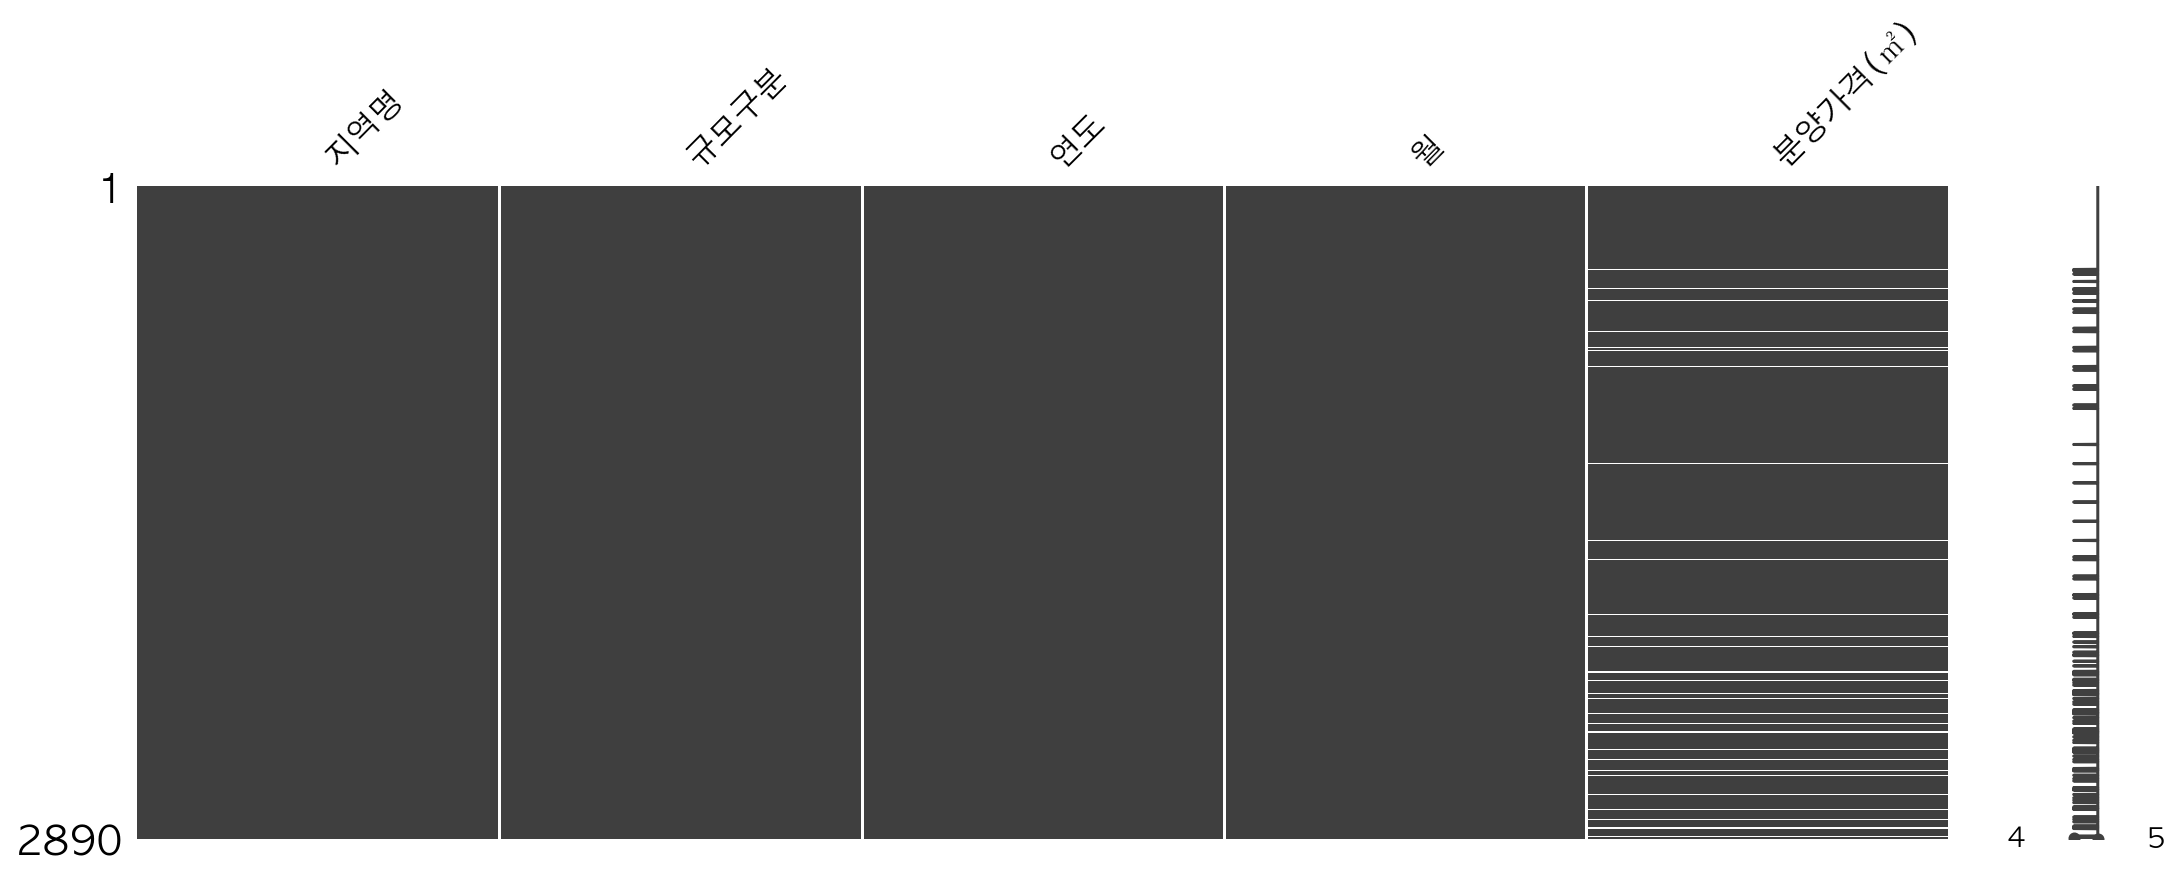

In [46]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [47]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [49]:
pre_sale_price = pre_sale['분양가격(㎡)']
pre_sale_price

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
2885    3334
2886     NaN
2887    3356
2888    3226
2889    2990
Name: 분양가격(㎡), Length: 2890, dtype: object

In [50]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [51]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2890 non-null   object 
 1   규모구분     2890 non-null   object 
 2   연도       2890 non-null   object 
 3   월        2890 non-null   object 
 4   분양가격(㎡)  2750 non-null   object 
 5   분양가격     2658 non-null   float64
 6   평당분양가격   2658 non-null   float64
dtypes: float64(2), object(5)
memory usage: 158.2+ KB


In [53]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [54]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [55]:
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [56]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,서울,전체,2016,10,2221
freq,170,578,1020,255,17


In [57]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [58]:
pre_sale['규모구분'].value_counts()

전체                   578
전용면적 60㎡이하           578
전용면적 60㎡초과 85㎡이하     578
전용면적 85㎡초과 102㎡이하    578
전용면적 102㎡초과          578
Name: 규모구분, dtype: int64

In [59]:
pre_sale['지역명'].value_counts()

서울    170
강원    170
경남    170
경북    170
전남    170
전북    170
충남    170
충북    170
세종    170
인천    170
울산    170
대전    170
광주    170
대구    170
부산    170
경기    170
제주    170
Name: 지역명, dtype: int64

# 전국 평균 분양 가격
- groupby와 pivot_table활용하기

In [60]:
pd.options.display.float_format = '{:,.0f}'.format

In [62]:
# 분양 가격만 봤을 때 2015년도에서 2018년으로 갈 수록 오른 것을 알 수 있습니다.
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

In [63]:
pre_sale.pivot_table('평당분양가격',"규모구분","연도")

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


# 전국 분양가 변동금액

규모 구분이 전체로 되어있는 금액으로 연도별 변동 금액을 살펴봅시다.

In [64]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [65]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,087,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 369,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,669,588원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


## 연도별 변동 그래프

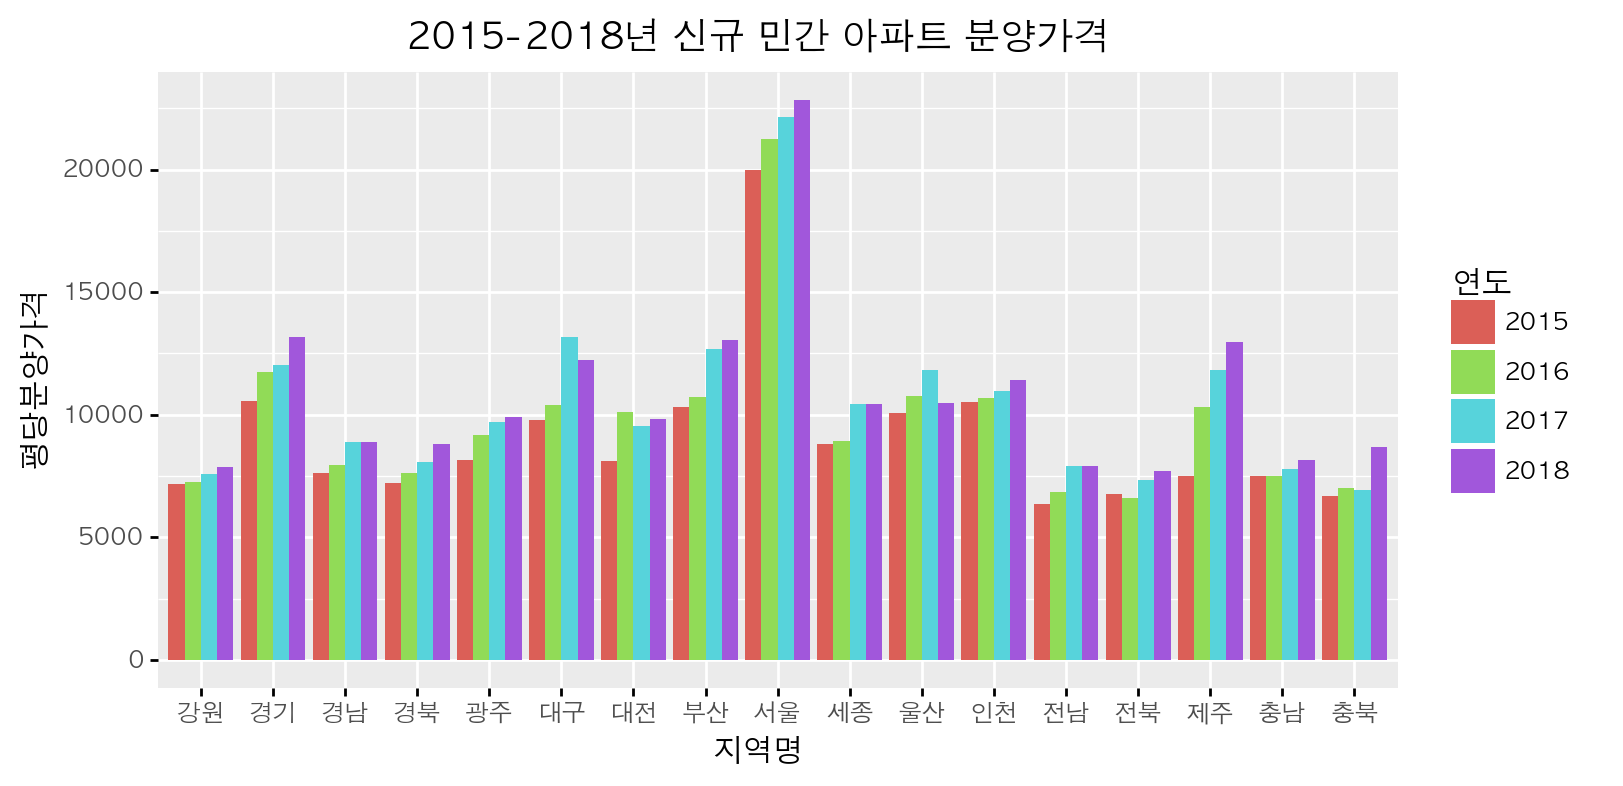

<ggplot: (398104619)>

In [68]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='AppleGothic'),
         figure_size=(8, 4))
)

In [69]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,899","13,647","9,226","8,616","10,296","12,334","14,282","12,590","22,058","9,292","9,974","13,836","7,568","7,842","10,416","8,478","7,933"
전용면적 60㎡이하,"7,195","12,385","8,343","7,662","8,518","11,285","8,798","10,707","22,046","9,107","8,965","10,870","6,991","7,232","14,700","7,782","6,969"
전용면적 60㎡초과 85㎡이하,"7,228","11,691","8,110","7,690","9,176","10,931","8,807","11,191","20,781","9,272","10,641","10,748","6,968","6,891","9,943","7,504","7,044"
전용면적 85㎡초과 102㎡이하,"7,686","12,130","9,822","8,776","9,296","9,589","9,037","11,039","23,754","9,245","8,861","11,267","7,882","7,770","10,739","9,090","8,171"
전체,"7,197","11,706","8,137","7,696","9,167","10,897","8,880","11,295","21,169","9,263","10,619","10,739","6,982","6,902","10,253","7,494","6,994"


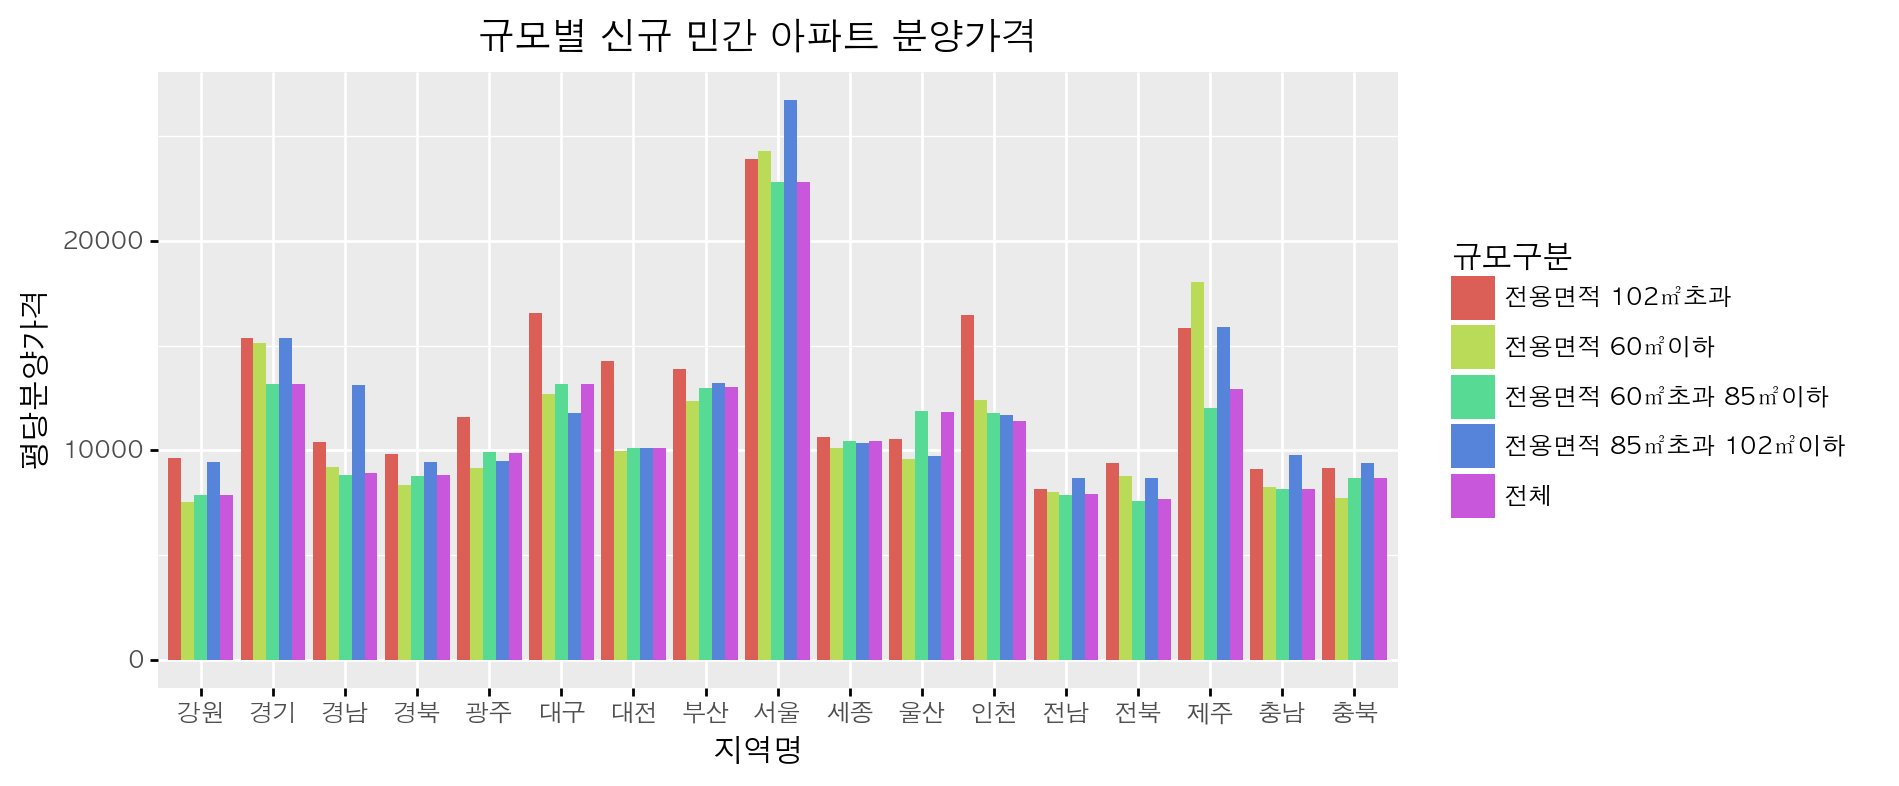

<ggplot: (399631610)>

In [72]:
# 규모별
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='AppleGothic'),
         figure_size=(8, 4))
)

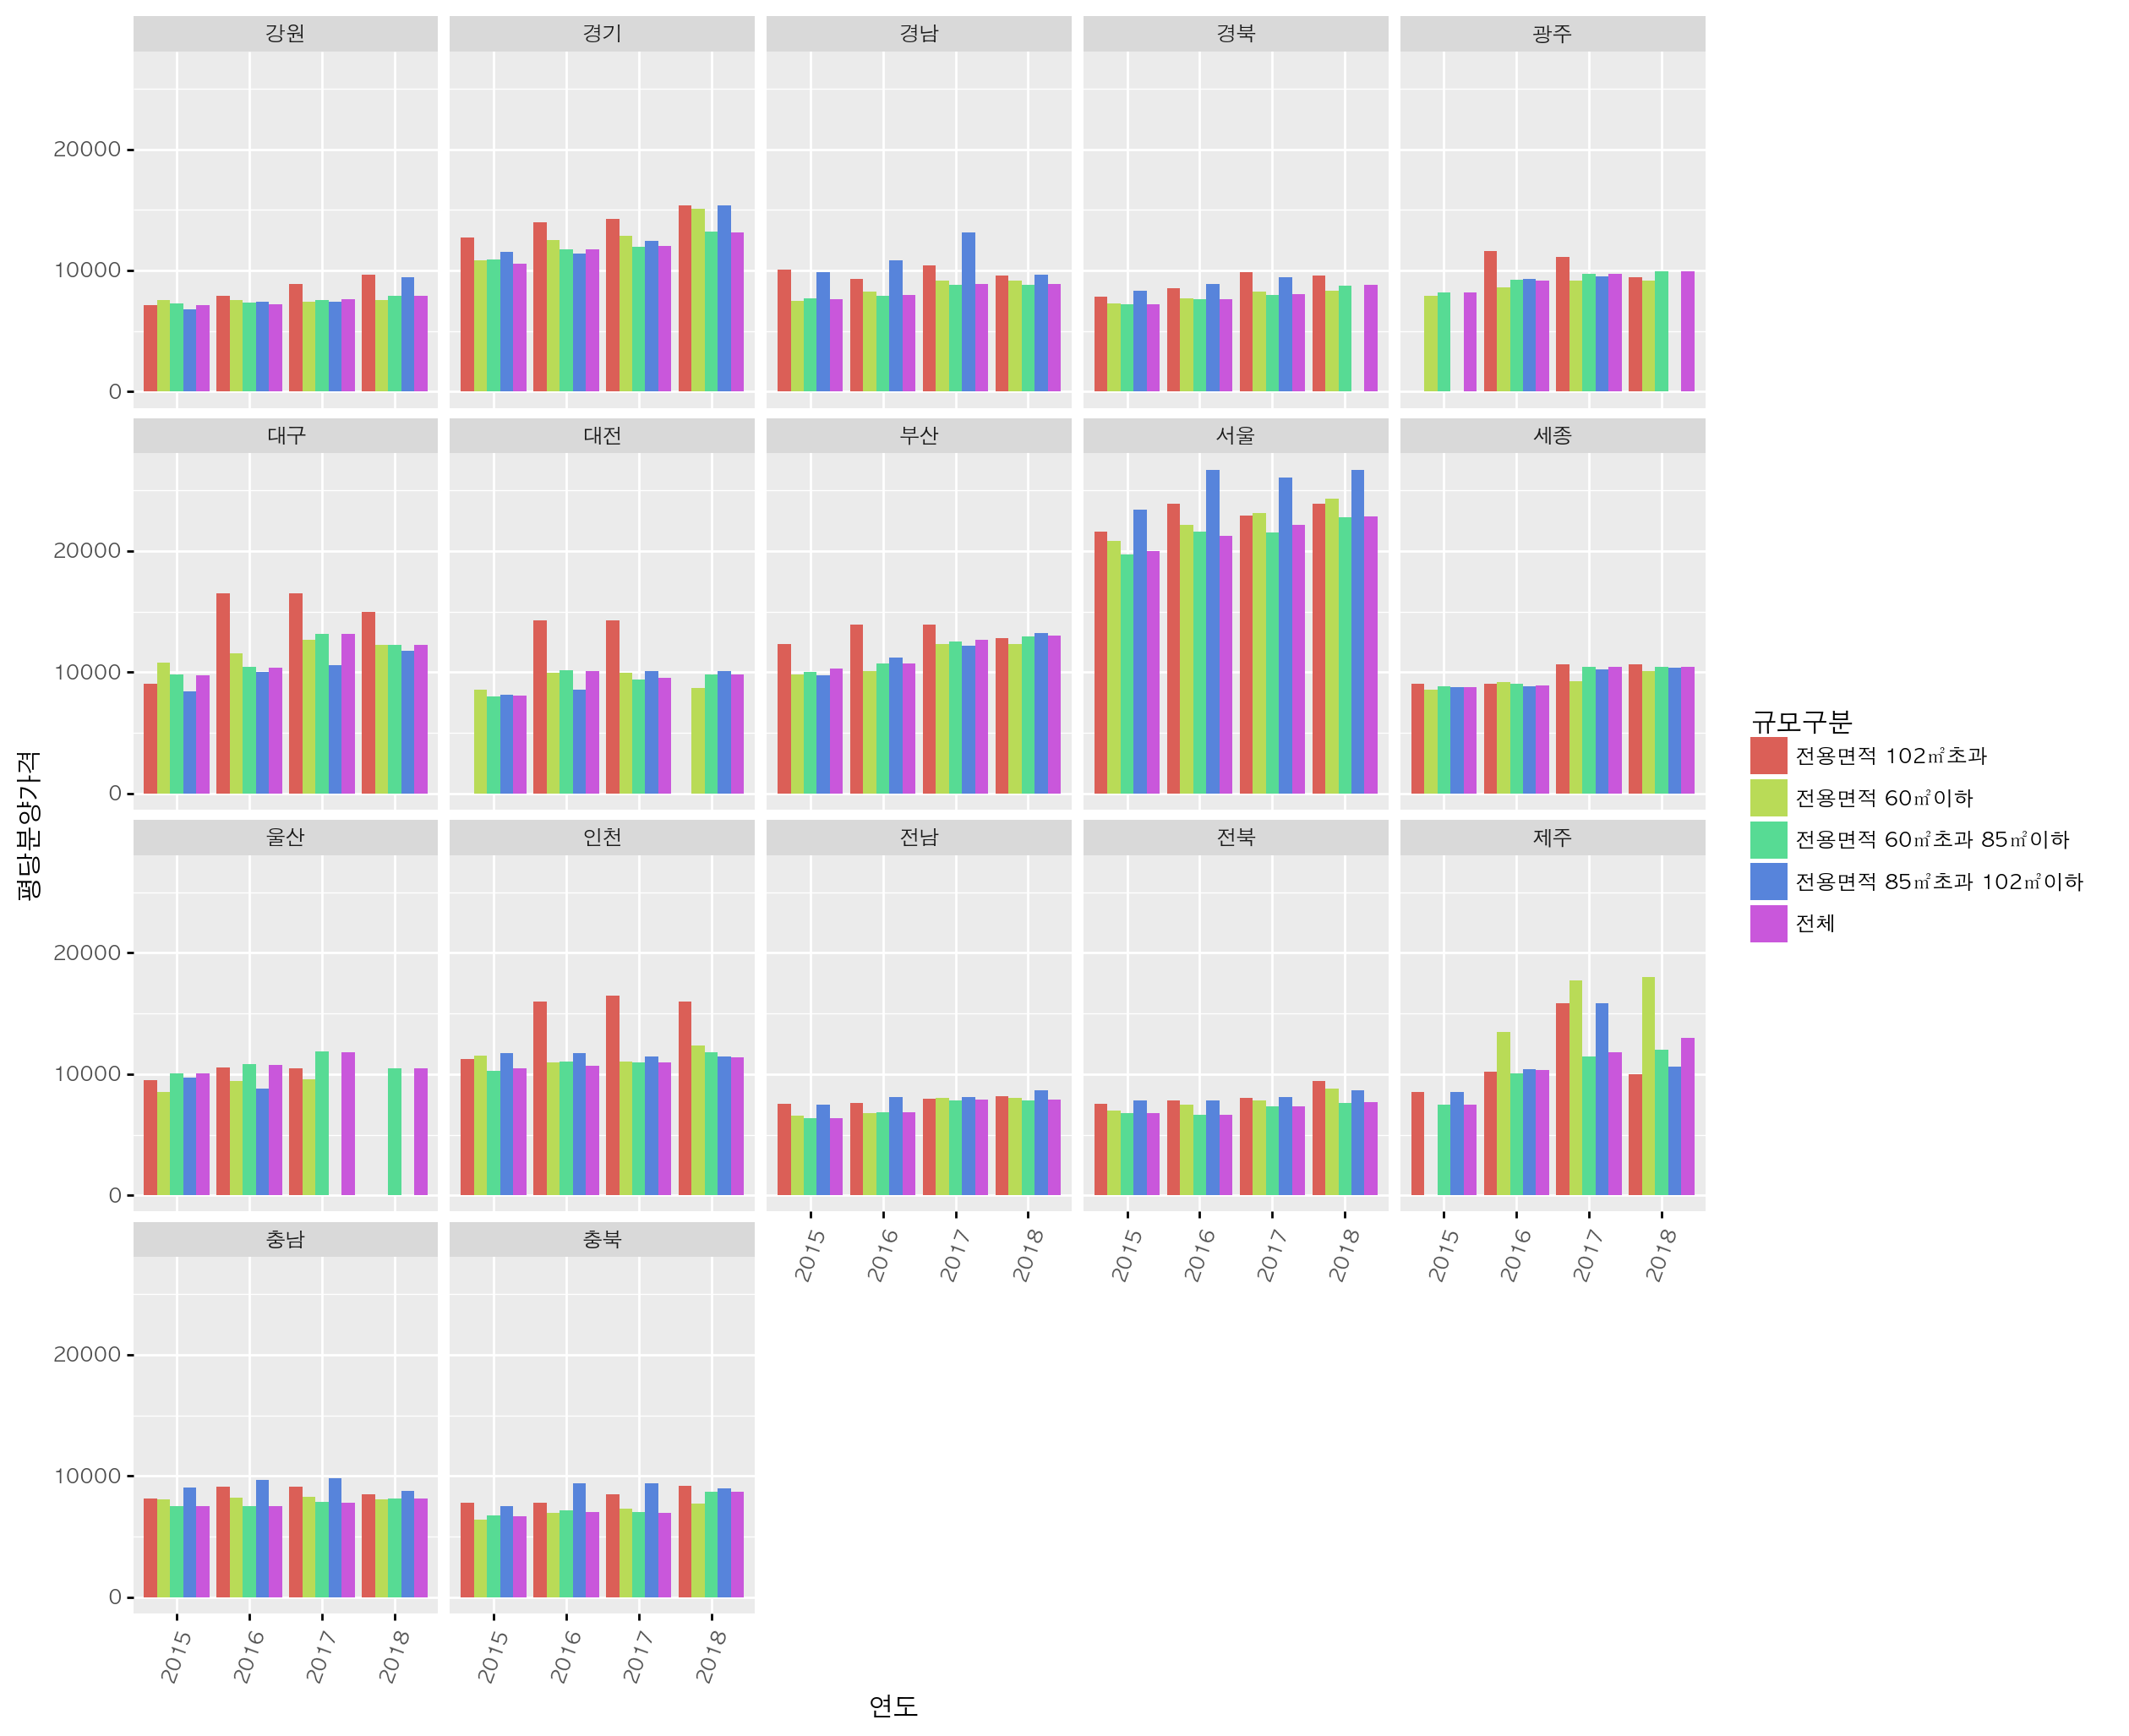

<ggplot: (398019033)>

In [74]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='AppleGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

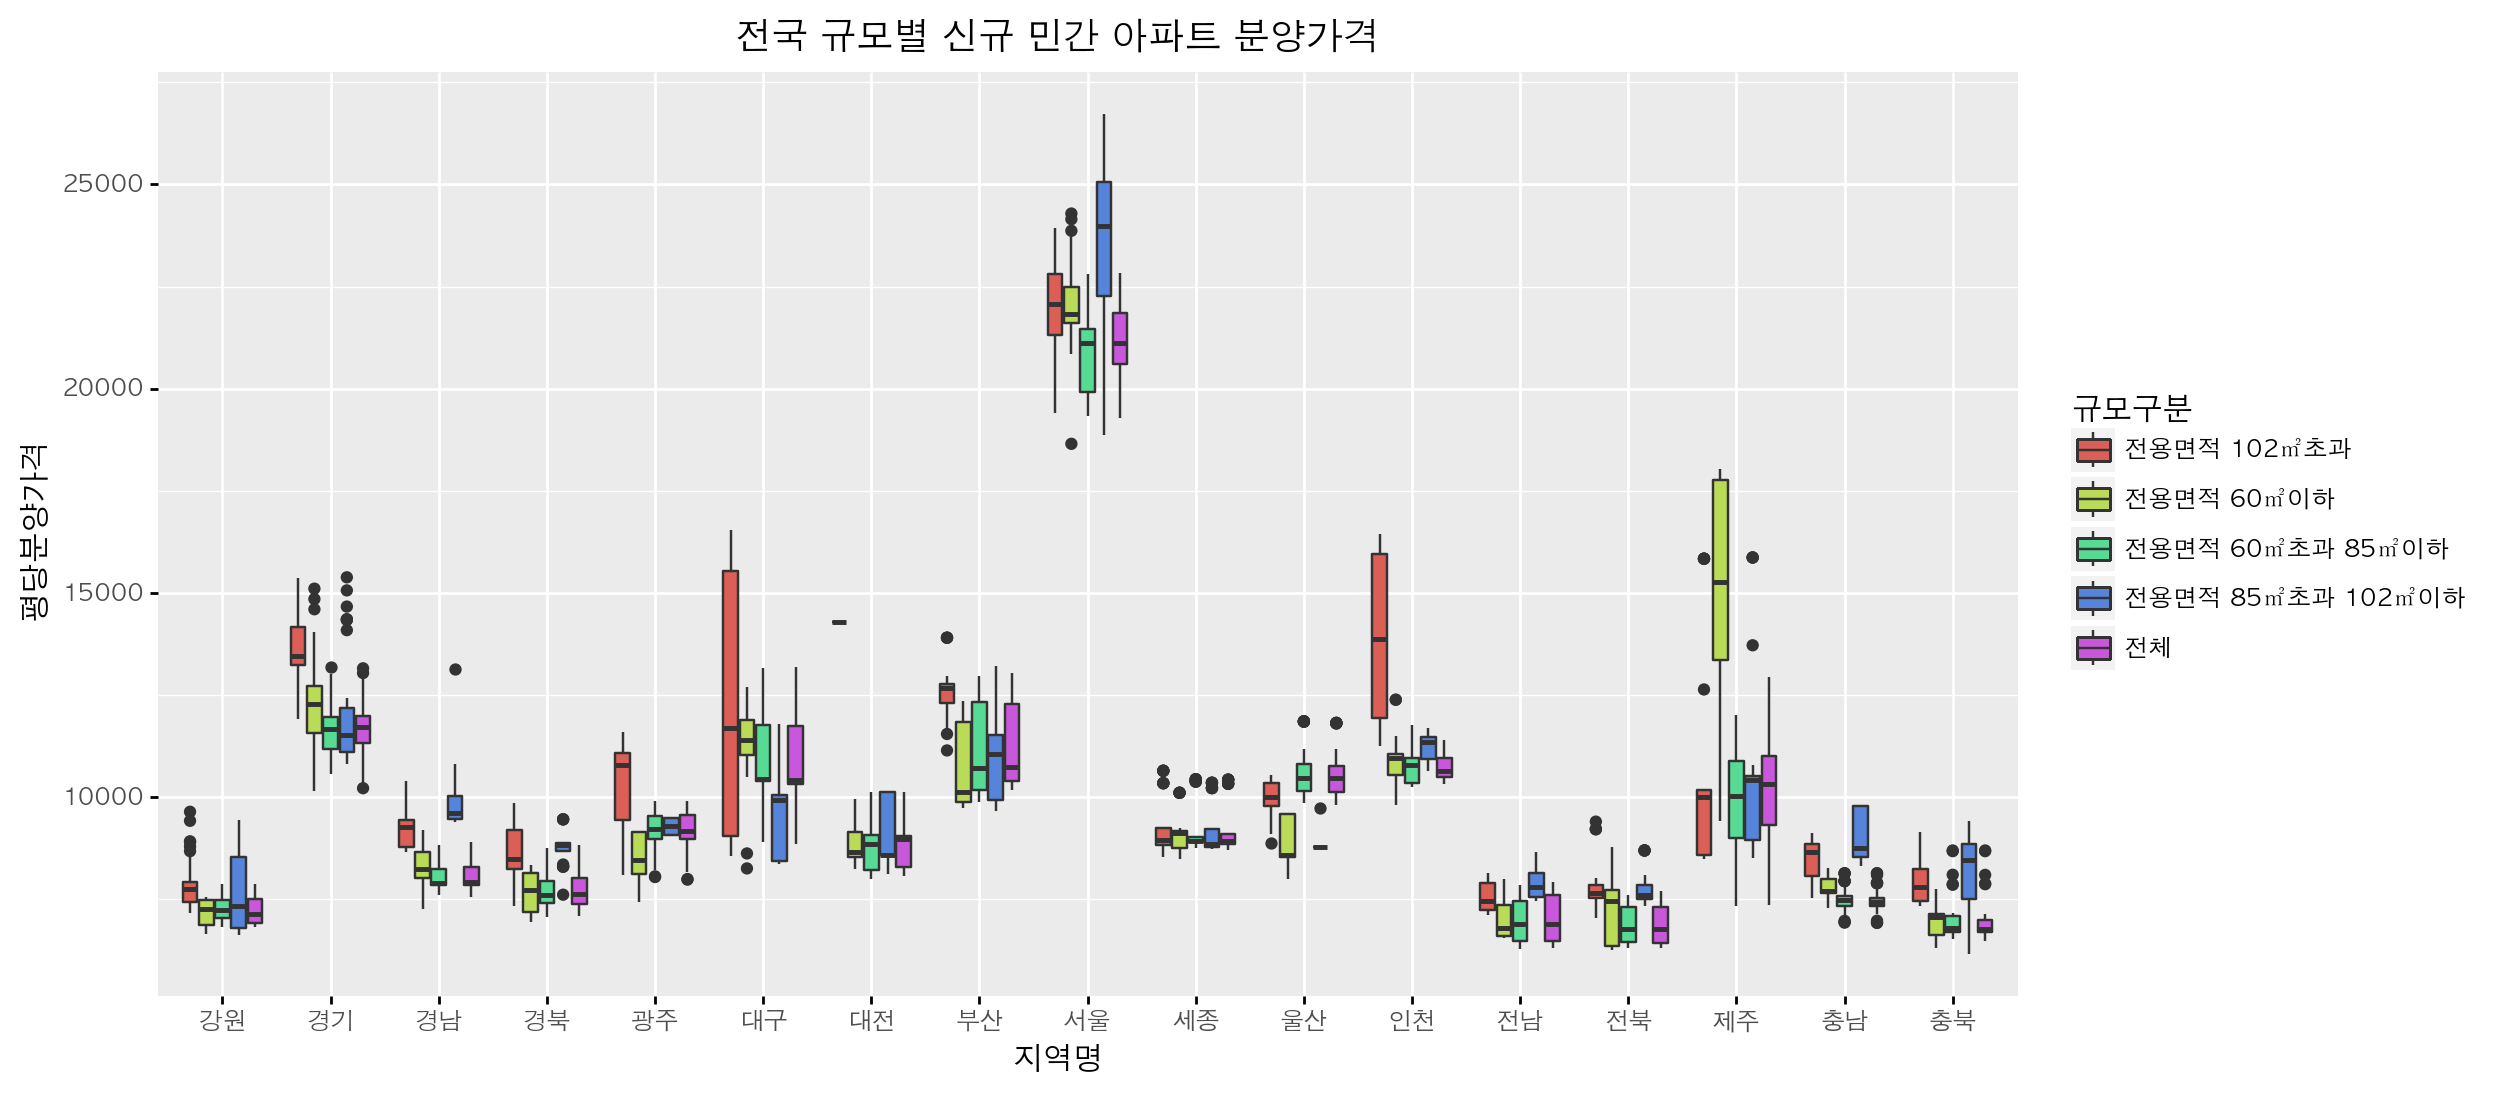

<ggplot: (693506238)>

In [76]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='AppleGothic'),
         figure_size=(12, 6))
)

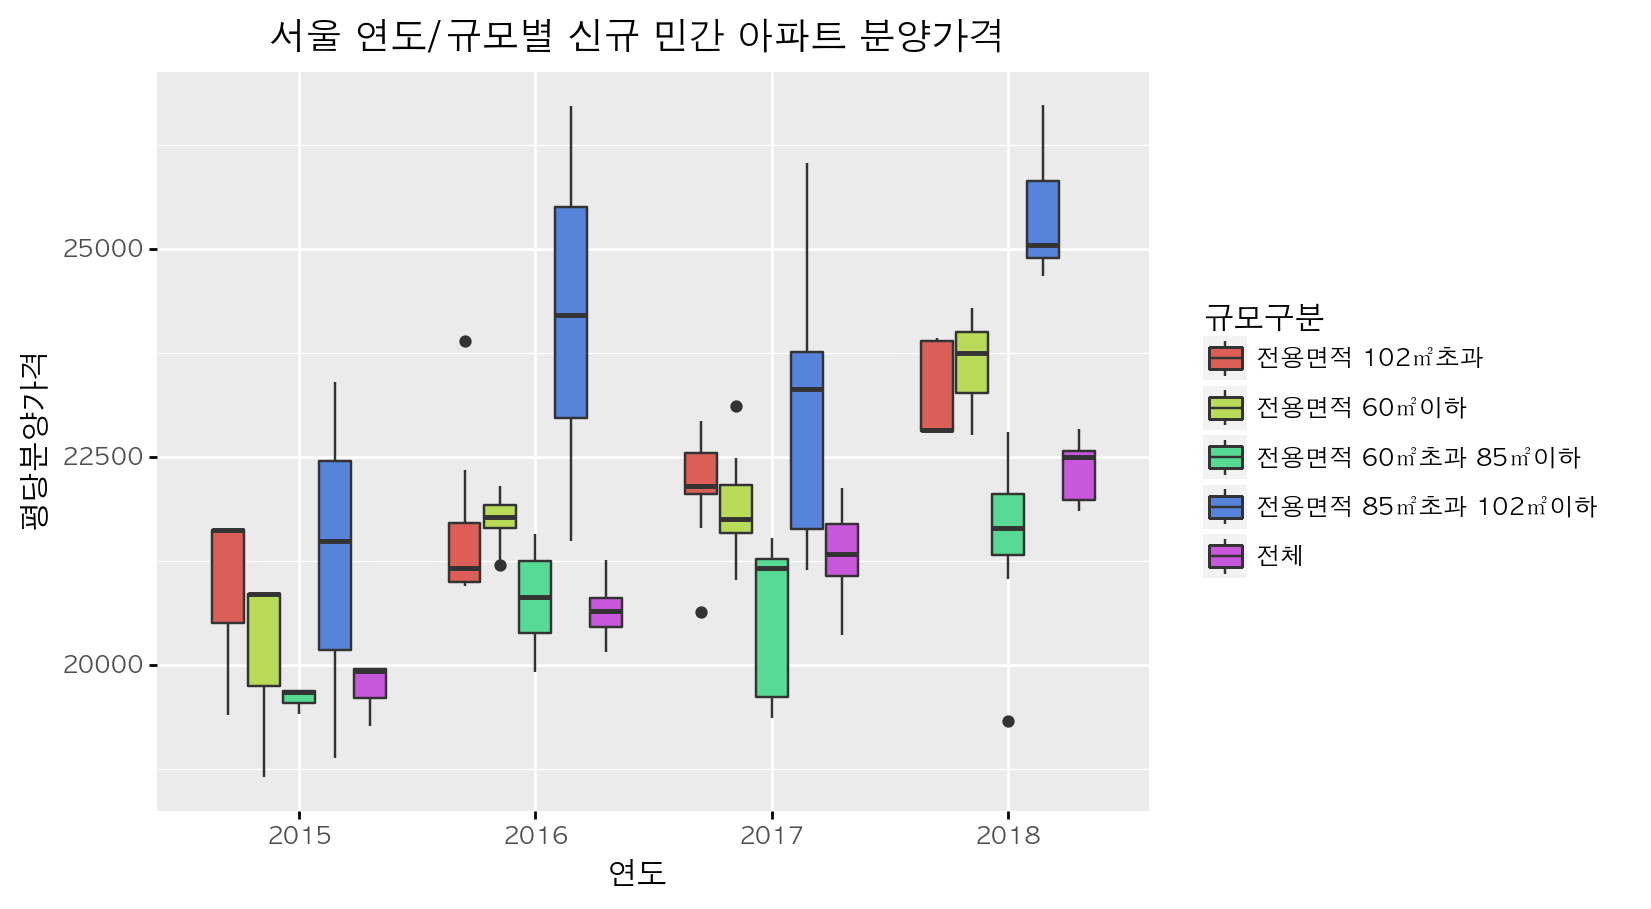

<ggplot: (695950445)>

In [78]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='AppleGothic'))
)

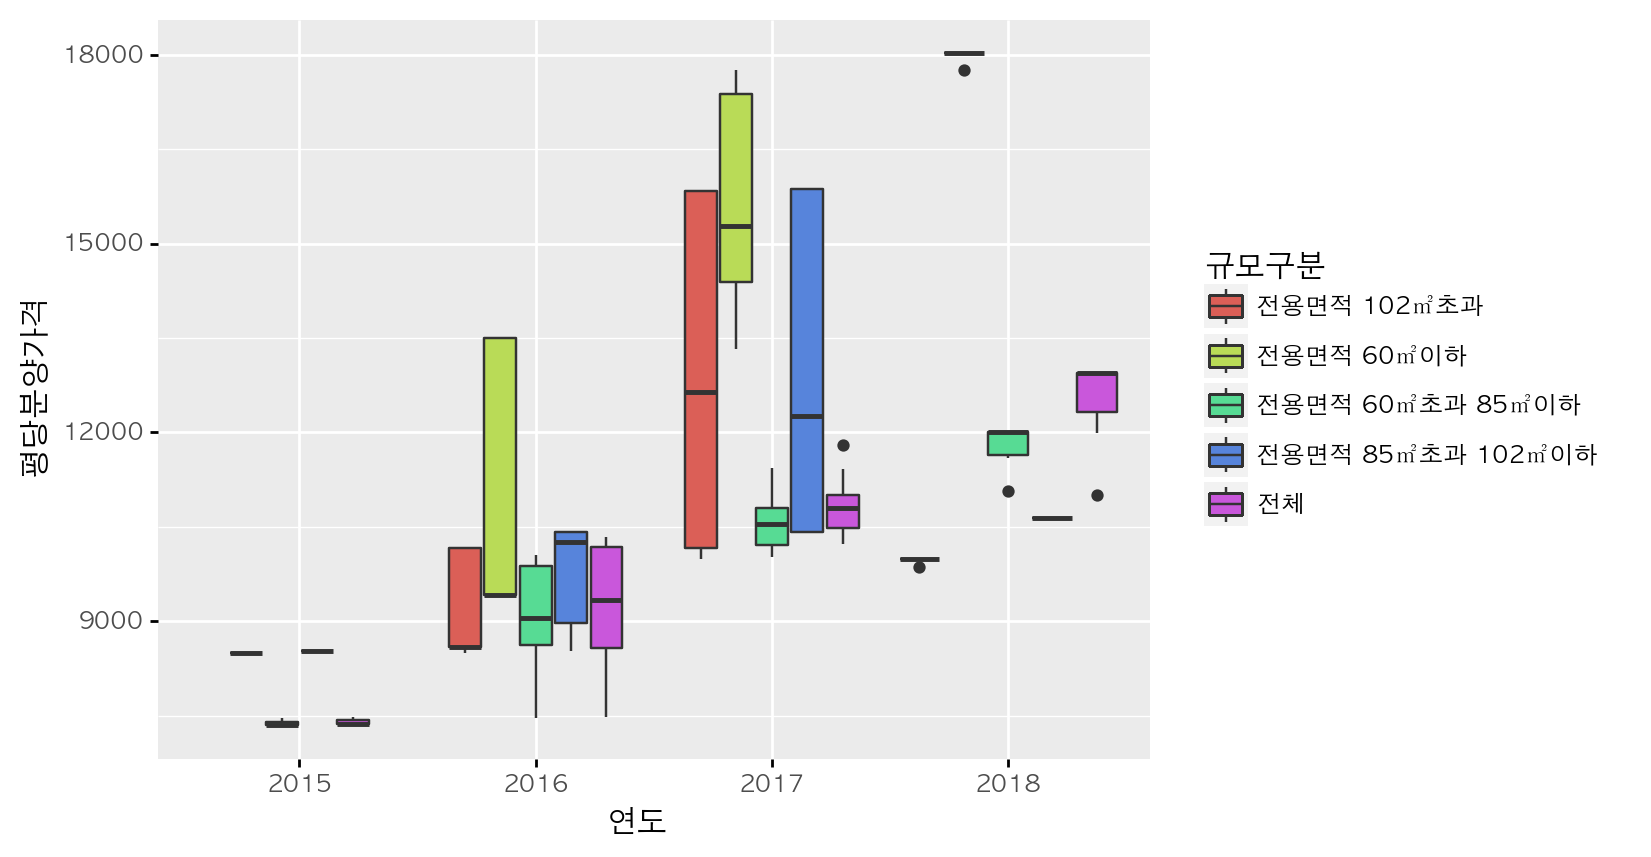

<ggplot: (696141291)>

In [80]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='AppleGothic'))
)

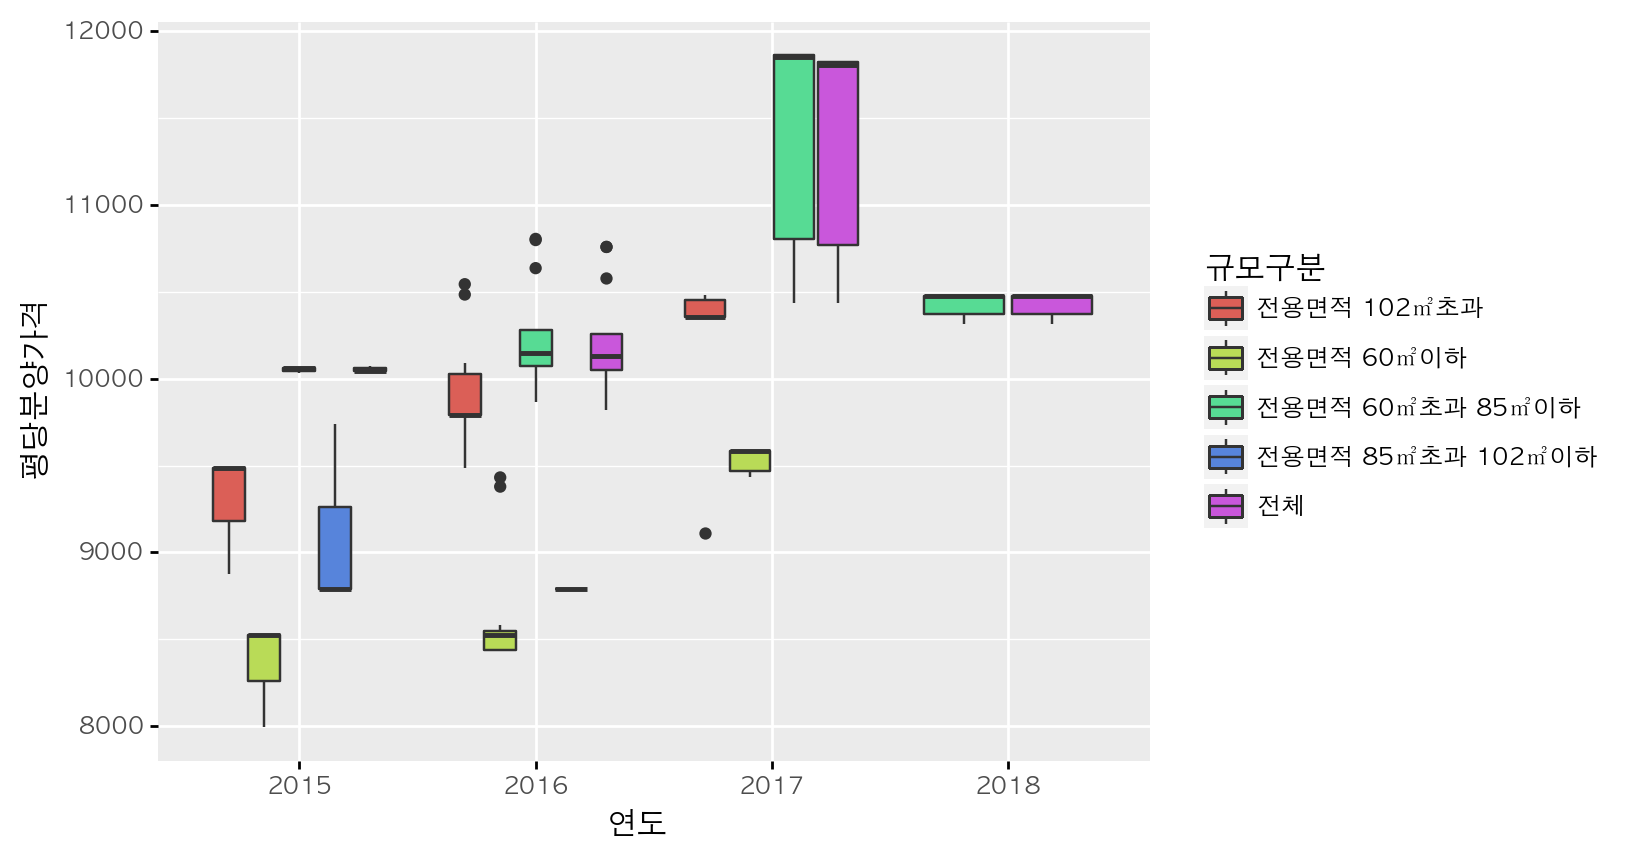

<ggplot: (400003371)>

In [82]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 봅니다.
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보였습니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='AppleGothic'))
)

In [84]:
df = pd.read_csv('data/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0)
df.shape

(23, 27)

In [85]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [86]:
year = df.iloc[0]
month = df.iloc[1]

In [87]:
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [88]:
month

Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnamed: 9        7월
Unnamed: 10       8월
Unnamed: 11       9월
Unnamed: 12      10월
Unnamed: 13      11월
Unnamed: 14      12월
Unnamed: 15       1월
Unnamed: 16       2월
Unnamed: 17       3월
Unnamed: 18       4월
Unnamed: 19       5월
Unnamed: 20       6월
Unnamed: 21       7월
Unnamed: 22       8월
Unnamed: 23       9월
Unnamed: 24      전월비
Unnamed: 25     전년말비
Unnamed: 26    전년동월비
Name: 1, dtype: object

In [89]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2 :
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [90]:
df.columns = year

In [91]:
df = df.drop(df.index[[0,1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [92]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐준다.
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [93]:
df['지역'] = df['구분'] + df['시군구']

In [94]:
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [95]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [96]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [97]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [98]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [99]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2013년 12월,"8,067",2014,12
freq,44,21,7,252,42


In [100]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

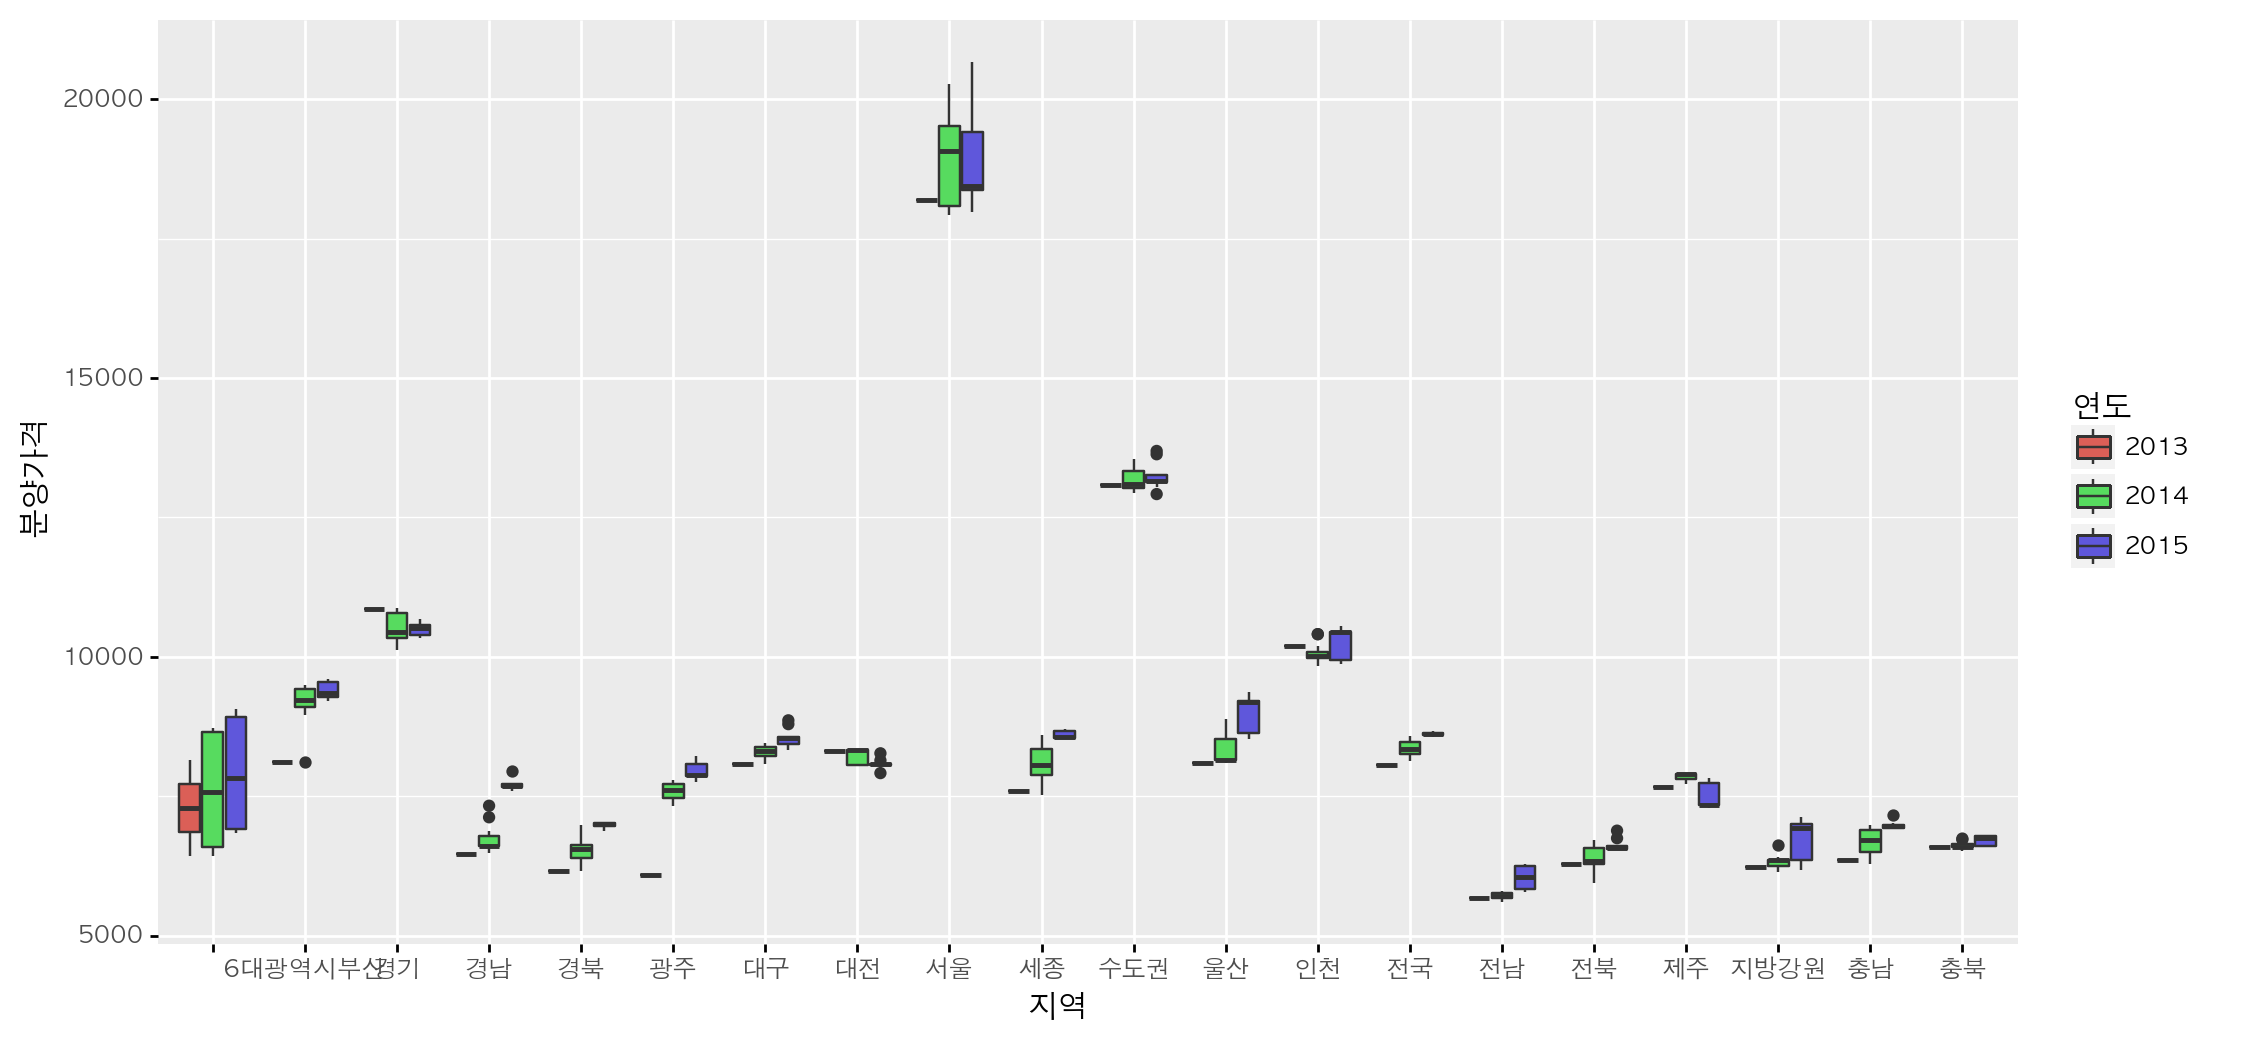

<ggplot: (394571981)>

In [101]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family='AppleGothic'),
         figure_size=(12, 6))
)

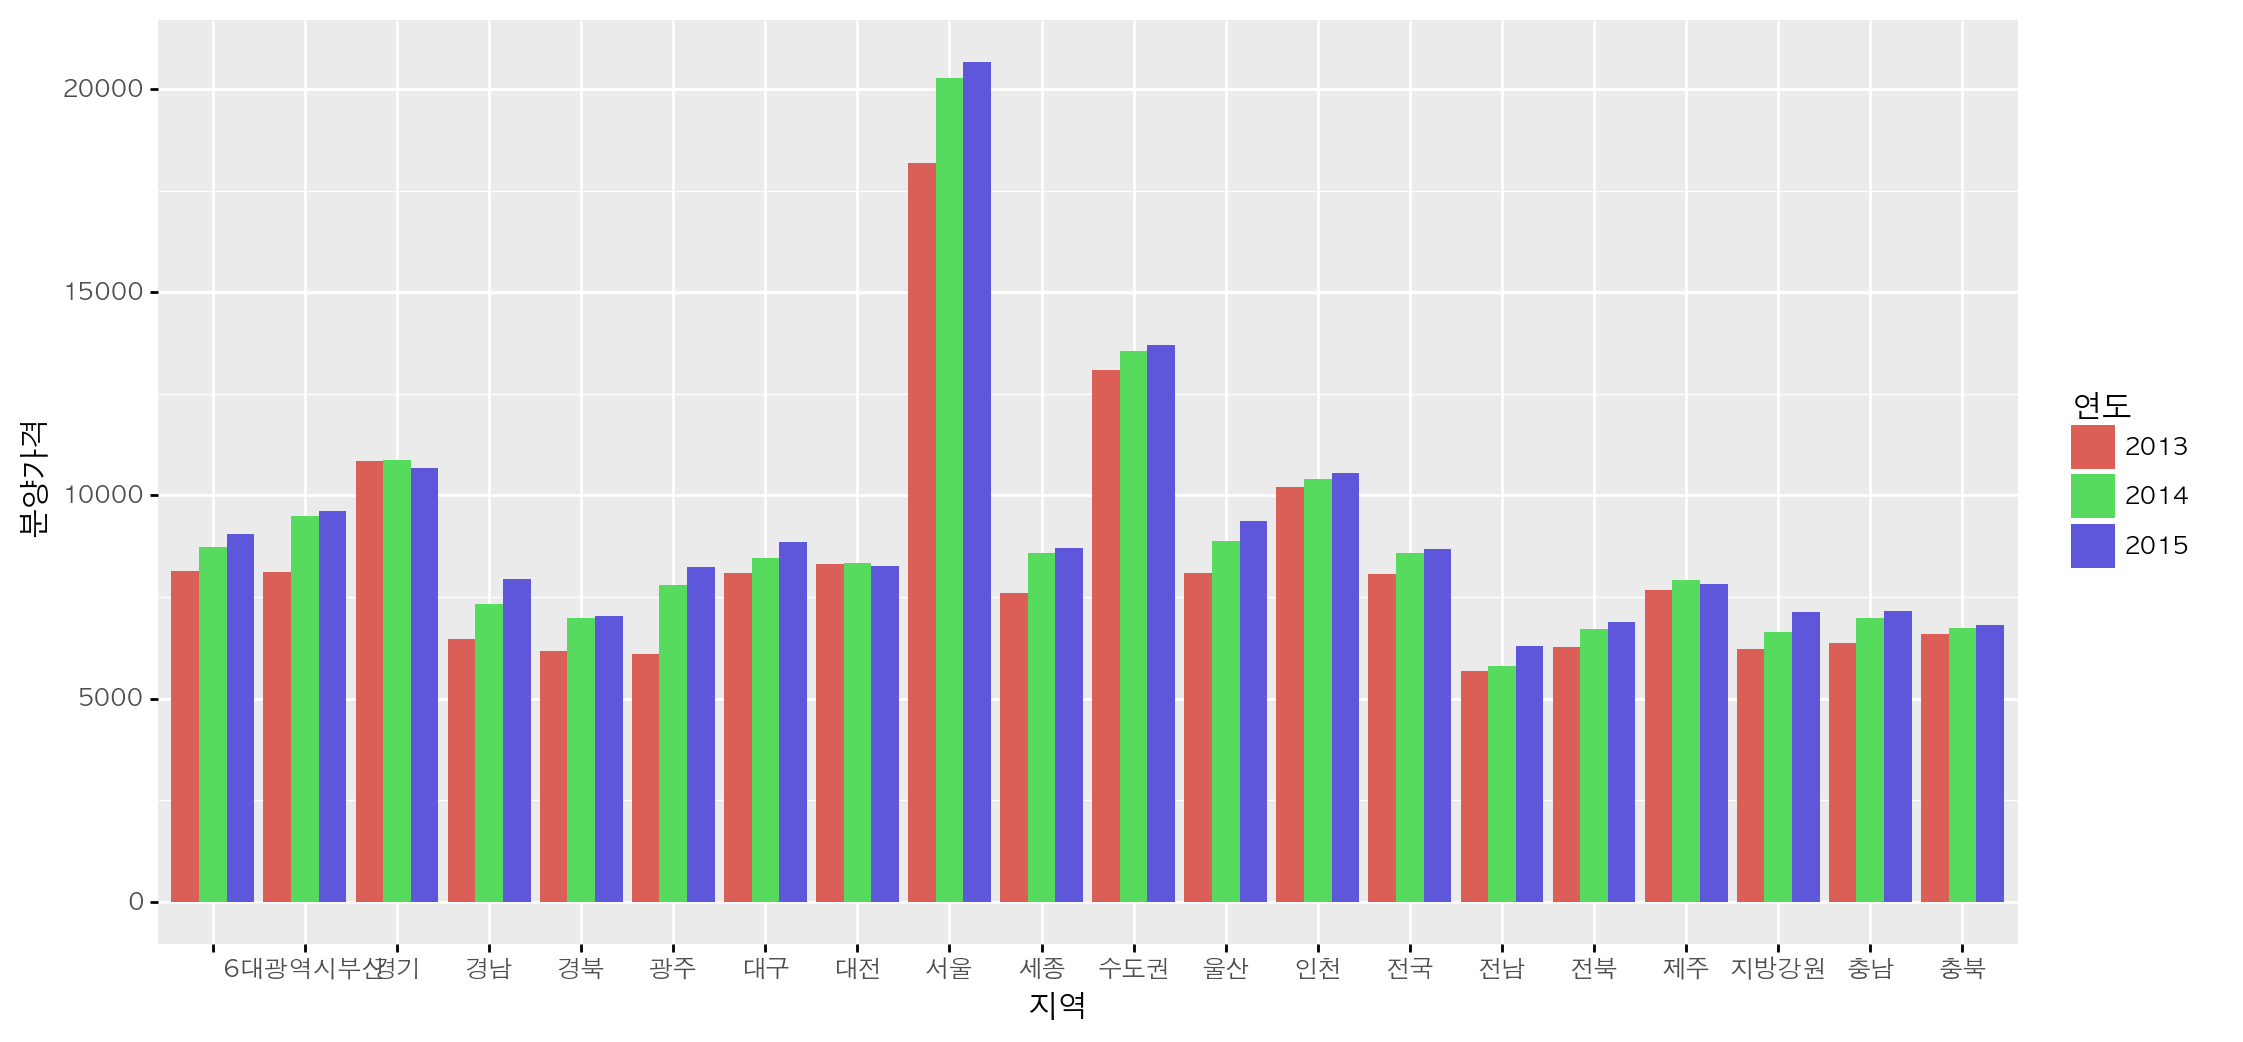

<ggplot: (394865149)>

In [103]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='AppleGothic'),
         figure_size=(12, 6))
)

In [104]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [105]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [106]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,6대광역시부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [107]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [108]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [109]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [110]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1040, 4)

In [111]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,6대광역시부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [112]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '6대광역시부산', '대구', '인천', '광주', '대전', '울산', '', '경기',
       '수도권', '세종', '지방강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'],
      dtype=object)

In [113]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [114]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region

['전국', '6대광역시부산', '', '수도권', '지방강원']

In [115]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [116]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

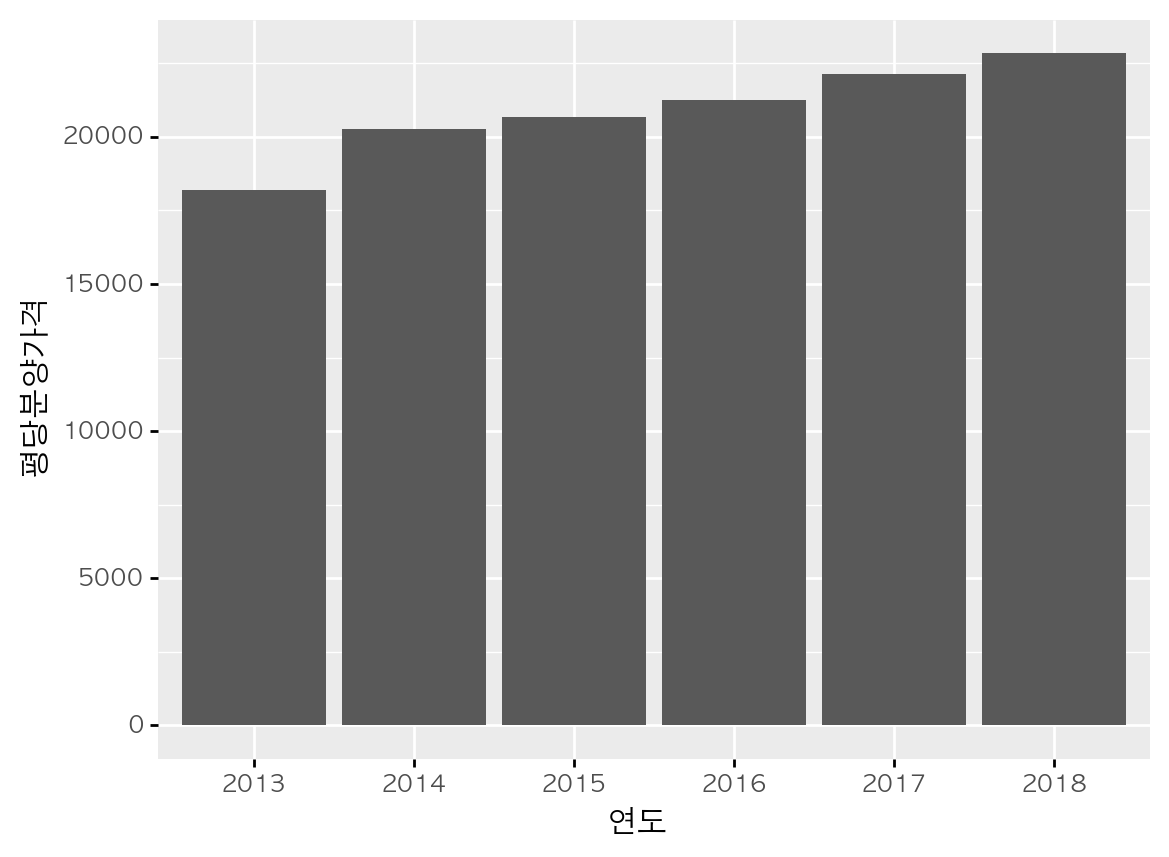

<ggplot: (395783045)>

In [118]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='AppleGothic'))
)

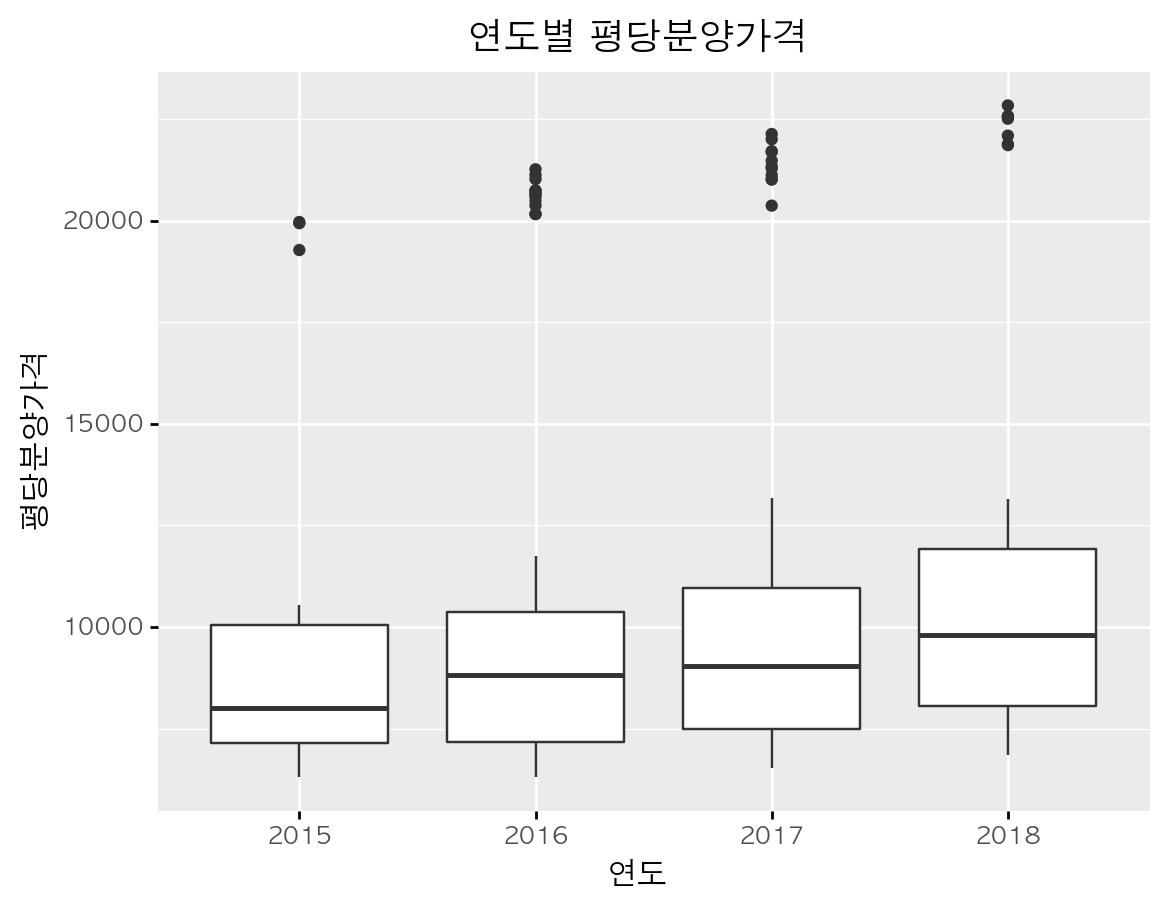

<ggplot: (395872290)>

In [119]:
(ggplot(df_2015_2018_prepare)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='AppleGothic'))
)

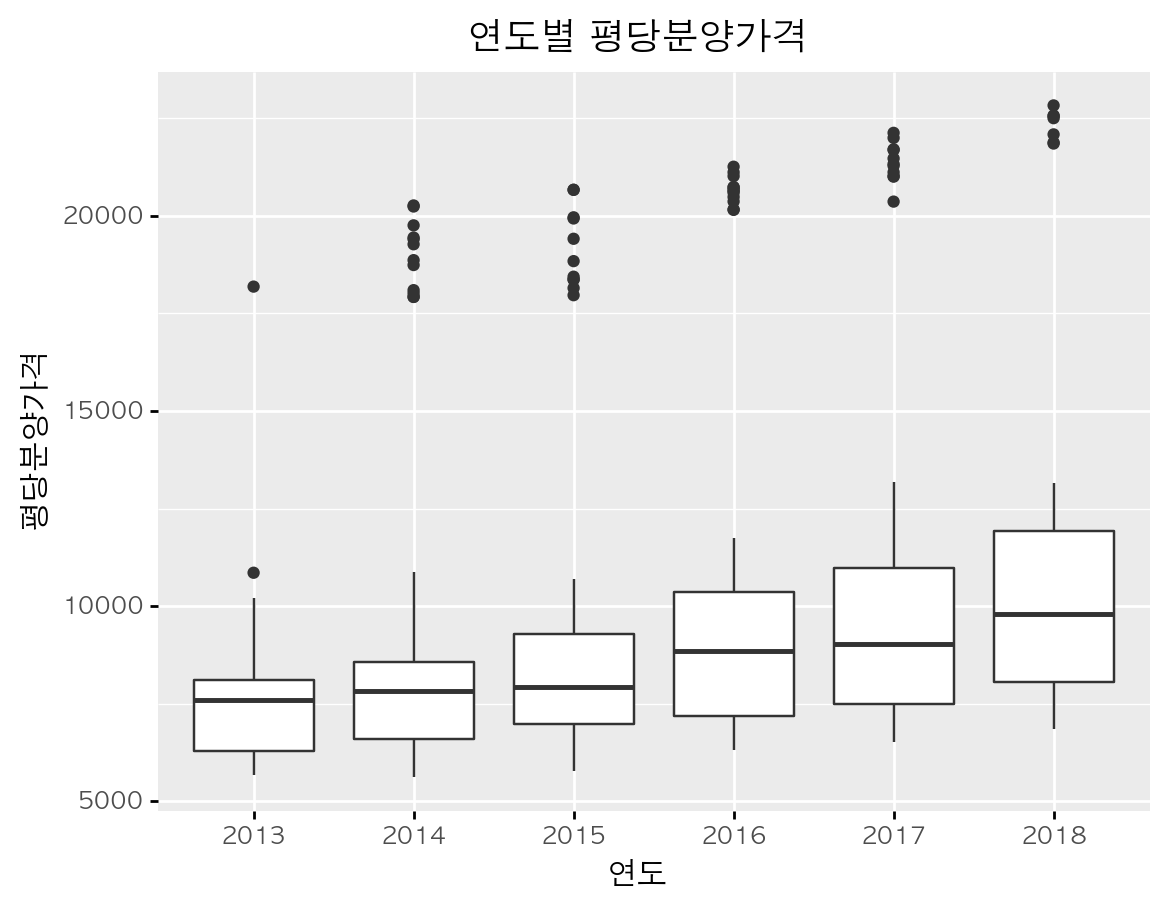

<ggplot: (394864906)>

In [120]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='AppleGothic'))
)

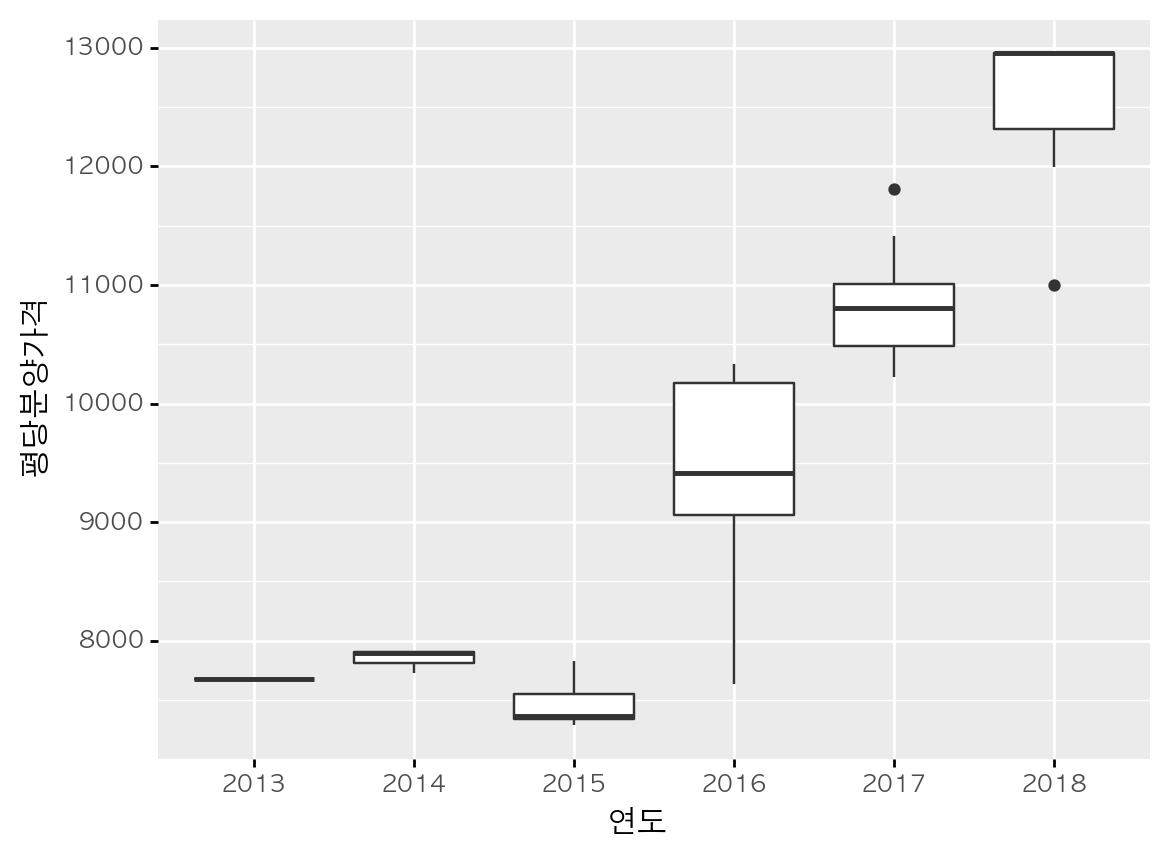

<ggplot: (396028151)>

In [121]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='AppleGothic'))
)

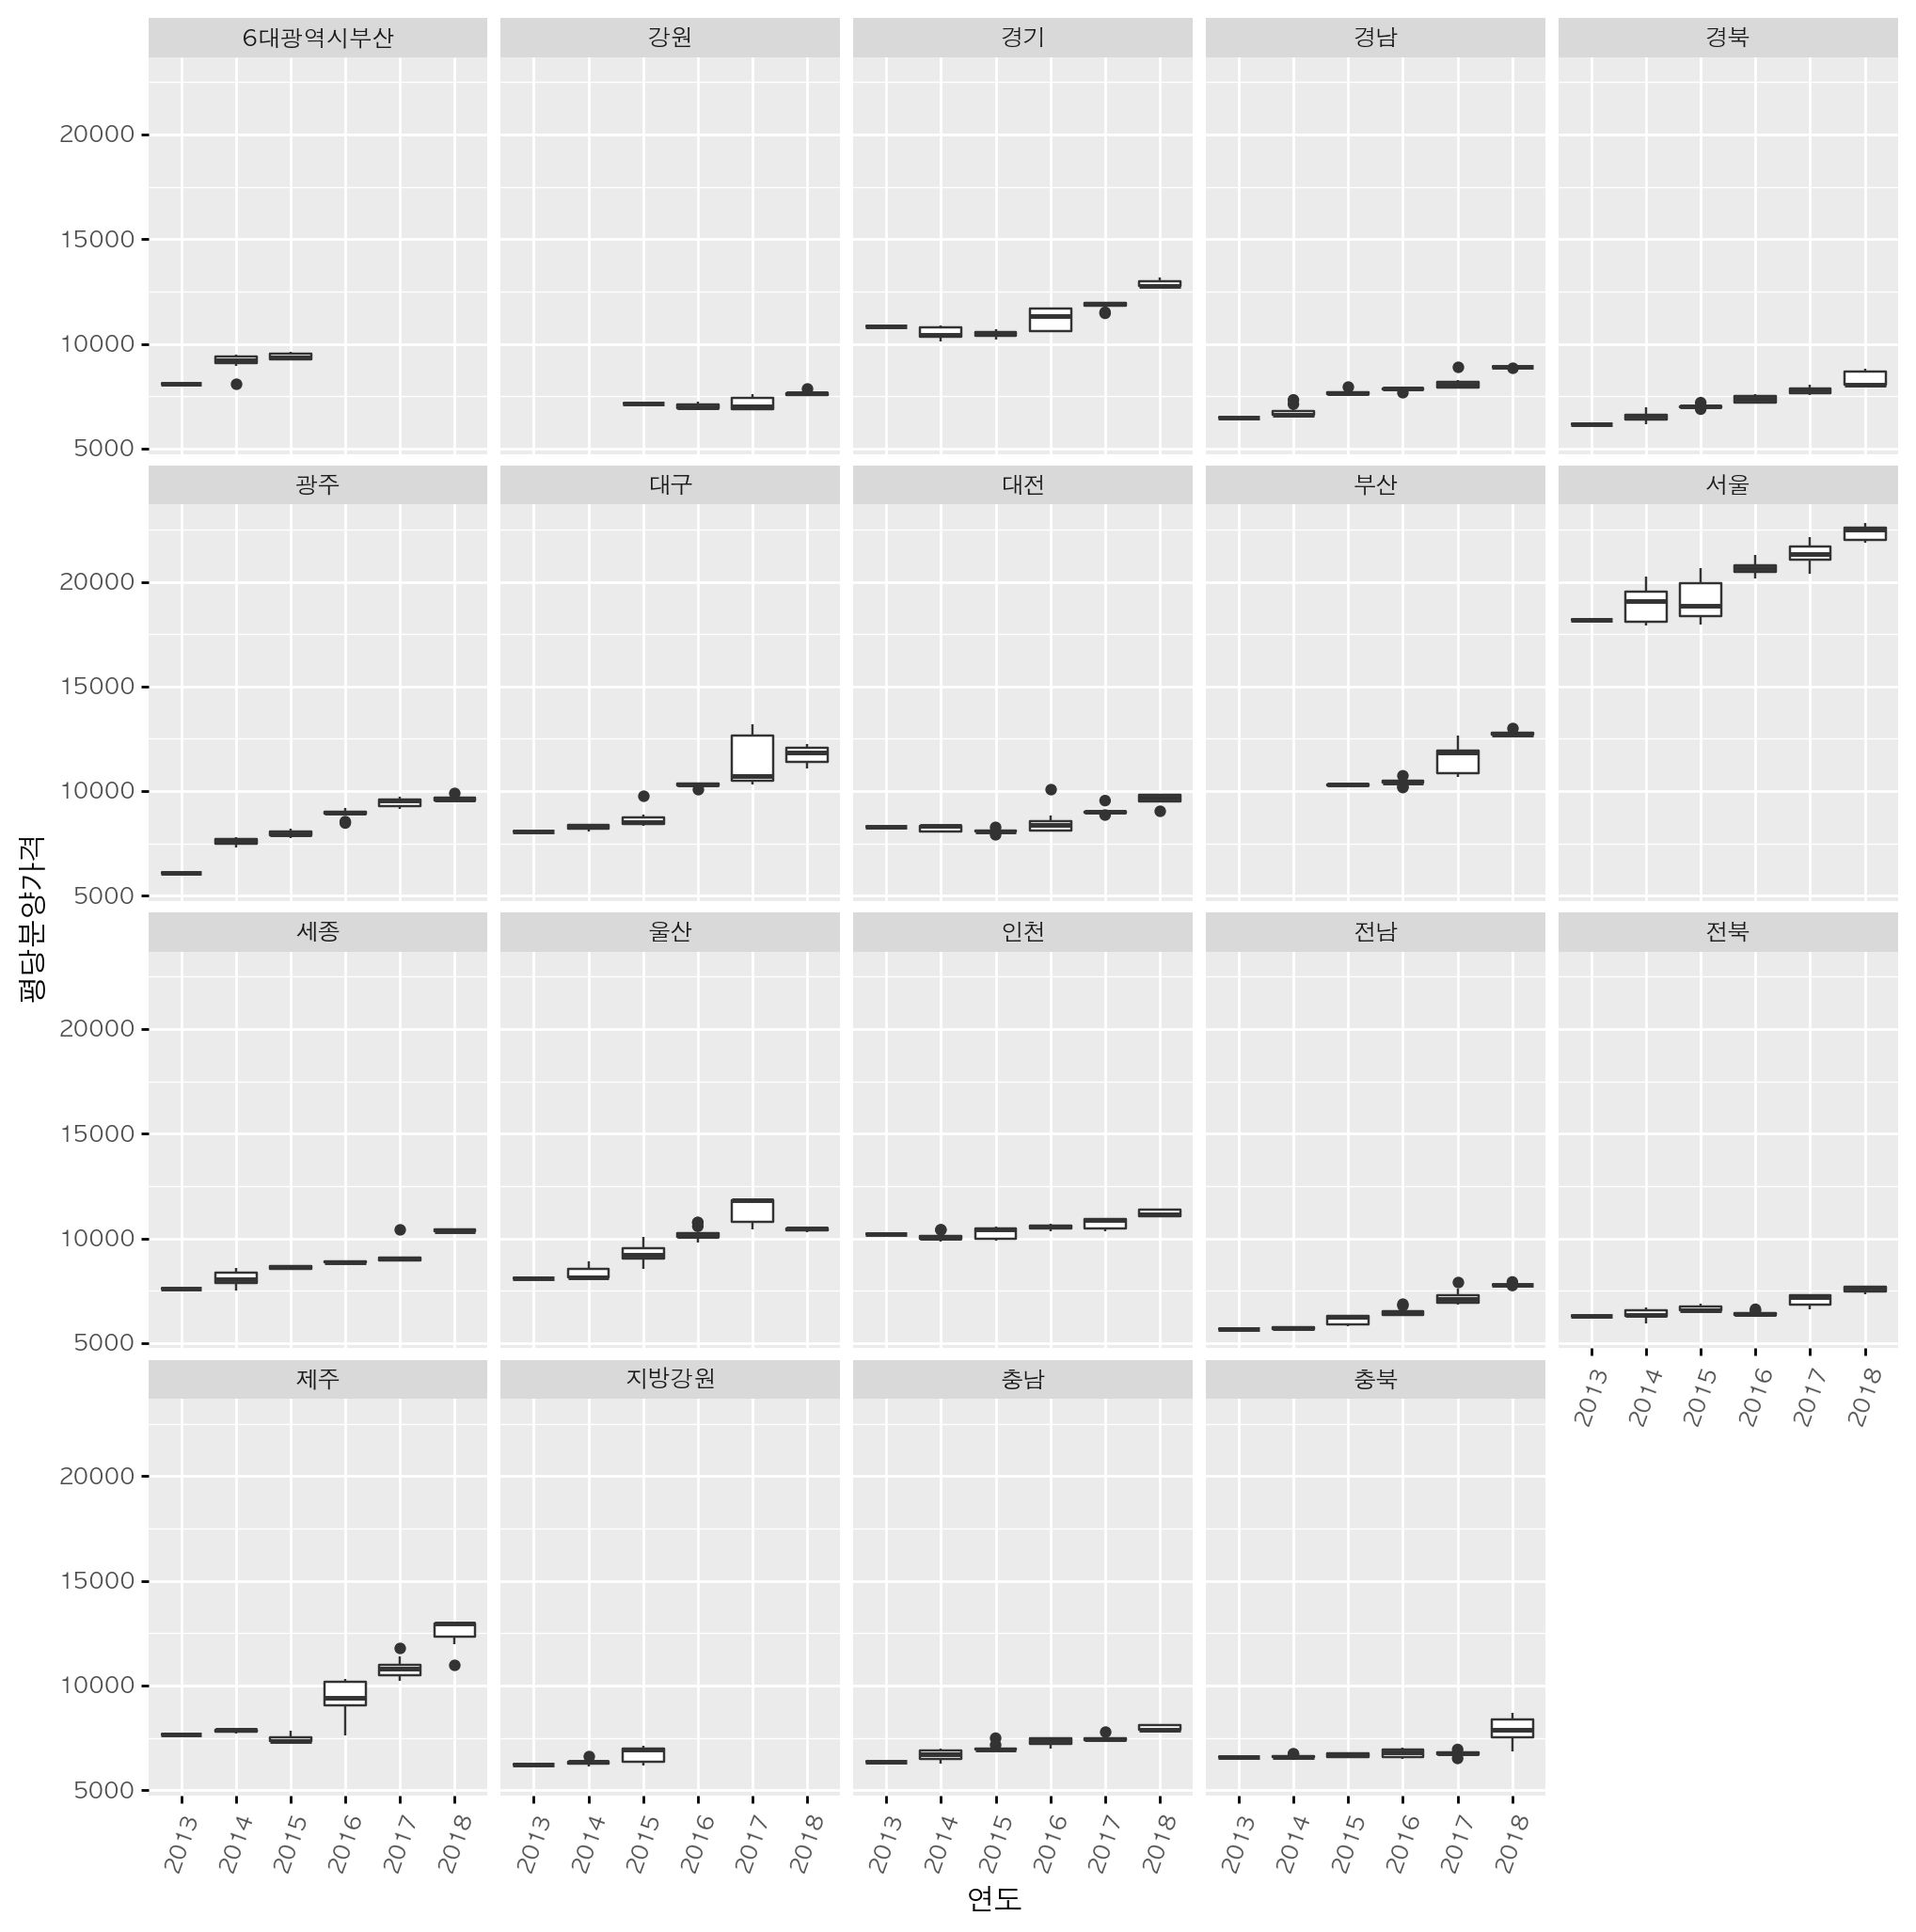

<ggplot: (396082414)>

In [122]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(family='AppleGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)